## Neural Network and Deep Neural Network

Neural Network는 Layer가 두 개 이상인 모형을 의미한다. Layer가 심층적으로 쌓인 경우, Deep Neural Network라고 한다

<center>

![nn.png](Image/neural.png)

</center>

Neural Network에서는 계수(Coefficient)보다는 가중치(Weights)로 더 많이 통용된다. 추정하는 가중치 parameter는 결국 선형모형에서 Coefficient를 추정하는것과 같다.

**활성화 함수(Activation Function)** 는 통계학에서의 연결 함수의 개념을 차용한 것이다. 

대표적인 연결 함수로는 log, sigmoid, logistic이 존재하는데, 이중 sigmoid와 logistic은 초창기 Neural Network model의 활성화 함수로 사용된 것이다



#### 1. Input Layers

입력층에서는 데이터의 특성들이 입력된다. 입력 벡터 $\mathbf{x} = [x_1, x_2, ..., x_n]$는 특성 공간에서의 값들을 나타낸다. 입력값 $x_i$는 첫 번째 은닉층으로 전달된다.

$$\mathbf{x} = [x_1, x_2, ..., x_n]$$

#### 2. Hidden Layer

은닉층은 입력값에 가중치(weight)를 곱하고, 그 결과에 **편향(bias)** 을 더한 후 **활성화 함수(activation function)** 를 적용하여 비선형성을 도입한다.

입력 벡터 $\mathbf{x}$가 은닉층으로 전달되며, 가중치 행렬 $\mathbf{W}^{(1)}$와 곱해진다. 이 때, $\mathbf{W}^{(1)}$는 입력층에서 은닉층으로의 가중치 행렬이다. 각 은닉층 노드 $h_j$에서의 계산은 다음과 같다.

$$h_j = f\left( \sum_{i=1}^{n} W_{ji}^{(1)} x_i + b_j^{(1)} \right)$$

여기서 $W_{ji}^{(1)}$는 입력 $x_i$에서 은닉층 뉴런 $h_j$로 가는 가중치, $b_j^{(1)}$는 은닉층 뉴런 $h_j$의 bias(y intercept)이며, $f$는 비선형 활성화 함수(ex. sigmoid, ReLU 등)이다. 통계학에서 활성화함수는 대개 연결 함수를 의미한다. 따라서 은닉층의 출력 벡터 $\mathbf{h}^{(1)}$는 다음과 같다.

$$\mathbf{h}^{(1)} = f\left( \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)} \right)$$

여기서 $\mathbf{W}^{(1)}$는 은닉층의 가중치 행렬, $\mathbf{b}^{(1)}$는 은닉층의 편향 벡터이다.

### 3. Output Layer

출력층도 은닉층과 동일하게 가중치와 편향을 사용하여 계산된다. 은닉층에서 계산된 값들을 출력층으로 전달하여 최종 예측을 생성한다.

은닉층의 출력값 $\mathbf{h}^{(1)}$는 출력층으로 전달된다. 출력층에서 각 출력 노드 $y_k$에 대한 계산은 다음과 같다

$$y_k = f\left( \sum_{j=1}^{m} W_{kj}^{(2)} h_j^{(1)} + b_k^{(2)} \right)$$

여기서 $W_{kj}^{(2)}$는 은닉층 노드 $h_j^{(1)}$에서 출력층 노드 $y_k$로 가는 가중치, $b_k^{(2)}$는 출력층 노드 $y_k$의 bias이고 $f$는 출력층에서 사용하는 활성화 함수이다. 출력층에서의 출력 벡터 $\mathbf{y}$는 다음과 같이 표현된다

$$\mathbf{y} = f\left( \mathbf{W}^{(2)} \mathbf{h}^{(1)} + \mathbf{b}^{(2)} \right)$$

여기서 $\mathbf{W}^{(2)}$는 출력층의 가중치 행렬, $\mathbf{b}^{(2)}$는 출력층의 편향 벡터이다

#### 4. Loss Function

모델이 예측한 값과 실제 값 사이의 차이를 평가하기 위해 손실 함수가 사용된다. 분류 문제에서는 **교차 엔트로피(cross-entropy)** 가 자주 사용되고, 회귀 문제에서는 **평균 제곱 오차(mean squared error, MSE)** 가 주로 사용된다. 교차 엔트로피 손실 함수는 다음과 같다.

$$L(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{k} y_k \log(\hat{y_k})$$

여기서 $y_k$는 실제 클래스 label, $\hat{y_k}$는 모델이 예측한 확률값이다.

#### 5. Steepest Gradient Descent & Backpropagation

**최대경사법(Steepest Gradient Descent)방법**은 단순히 현재 위치 $x_k$에서의 기울기 값 $g(x_k)$ 만을 이용하여 다음번 위치 $x_{k+1}$를 결정하는 방법이다.

$$ 
\begin{align}
x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
\tag{5.1.11}
\end{align}
$$

만약 현재 위치 $x_k$에서 기울기가 음수면 즉 곡면이 아래로 향하면 $g(x_k) < 0$이므로 앞으로 진행하고 현재 위치 $x_k$에서 기울기가 양수면  $g(x_k) > 0$이므로 뒤로 진행하게 되어 점점 낮은 위치로 옮겨간다. 이때 위치를 옮기는 거리를 결정하는 비례상수 $\mu$를 **스텝 사이즈(step size)**라고 한다. 

$x_k$가 일단 최적 점에 도달했을 때는 $g(x_k) = 0$이 되므로 더 이상 위치를 옮기지 않는다. 


신경망 학습의 핵심은 **역전파(backpropagation)** 를 통해 가중치를 업데이트하는 것이다. 역전파는 손실 함수의 기울기를 계산하여 가중치를 업데이트하는 방법이다. 이를 위해 **체인 룰(chain rule)** 을 사용한다. 손실 함수에 대한 가중치의 편미분은 다음과 같다.

$$\frac{\partial L}{\partial W_{ji}} = \frac{\partial L}{\partial y_k} \cdot \frac{\partial y_k}{\partial h_j} \cdot \frac{\partial h_j}{\partial W_{ji}}$$

가중치는 역전파와 경사 하강법(gradient descent)을 사용해 업데이트된다

$$W_{ji} = W_{ji} - \eta \frac{\partial L}{\partial W_{ji}}$$

여기서 $\eta$는 학습률(learning rate)이다

학습률을 너무 크게 하면, 해가 발산하는 문제가 생기고 너무 작게 하면 학습까지 너무 오래 시간이 걸린다는 문제를 가지고 있다. 따라서 적절한 학습률을 찾아야 한다.

<center>

![lr.png](Image/learning_rate.png)

</center>

#### 6. optimizer

하지만 경사하강법은 전역 최적해를 잘 찾지 못한다는 문제와, 해가 진동하거나 발산하는 등 적절한 해를 찾지 못한다는 문제점을 가지고 있다.

<center>

![global.png](Image/global.png)

</center>

이 문제를 해결하기 위해 다양한 optimization 기법들이 등장한다.

1. Stochastic Gradient Descent(SGD) : SGD는 경사하강법과 동일한 방법론을 사용하나, 전체 데이터를 사용하지 않고 미니 배치를 이용해 데이터 세트를 조금씩 훑어보고 가중치를 업데이트 한다. 다른 optimizer보다 단순하고 구현하기 쉽지만 비효율적인 경우가 많다.

2. Momentum : Momentum은 경사하강법을 보완한 방법으로, 과거의 진행 방향에 '관성'을 부여해 지역 최적해에서 잘 빠져나오나, 추가적 메모리를 요구하는 단점이 존재한다.

$$v_{t+1}=av_t-\eta \frac{dL}{dW_t} , \ W_{t+1}=W_t+v_{t+1}$$

3. Nesterov Accelerated Gradient(NAG) : NAG 방식은 Momentum을 기초로 하지만 미리 경사를 확인할 수 있게 하고 경사에 맞춰 속도를 조절한다. Momentum은 현재 위치에서의 기울기와 모멘텀 스텝을 독립적으로 계산하나, NAG 방식은 모멘텀 스텝을 먼저 이동시킨 후 그 위치에서 기울기를 계산한다.

4. Adaptive Gradient(AdaGrad) : 이 방법은 학습률을 상수가 아닌 변수값으로 취급해, 학습률을 감소시켜가며 최적해를 빠르고 정확하게 찾을 수 있게 하는 방법이다. 하지만 이 방법은 어느 순간 학습률이 0이 되어 더 이상 학습이 진행되지 않을 가능성이 존재한다는 단점이 있다.

5. RMSProp : RMSProp은 AdaGrad의 학습률 감소율을 기울기의 제곱 값이 아닌 기울기의 지수 평균으로 바꾸어 학습률이 0에 수렴하지 않게 만들었다.

6. Adaptive Moment Estimation(Adam) : Adam은 RMSProp과 Momentum을 결합한 optimizer이다. 즉, 관성과 학습률 감소법을 모두 적용시킨 optimizer이다

7. AdaMax : AdaMax는 Adam가 학습률 조절 방법을 L_2-norm으로 조정하는것을 수정하여 L_p-norm을 사용한다. 

8. Nadam : Nadam은 NAG와 Adam의 개념을 합친 방법이다. 일반적으로 Adam보다 더 빠르게 전역 최적화값을 찾아낼 수 있다고 알려져 있다.

#### 7. batch size and epoch

딥러닝 과정에서 입력되는 데이터의 사이즈가 커짐에 따라, 전체 데이터를 한번에 모델에 학습시키는 것이 점점 어려워졌다. 또한 한번의 계산으로 최적화된 값을 찾는 것도 쉽지 않은 일이다. 이 문제를 해결하기 위해 Epoch, Batch Size라는 개념이 등장한다.

<center>

![be.png](Image/batch&epoch.png)

</center>

Neural Network에서는 계수(Coefficient)보다는 가중치(Weights)로 더 많이 통용된다. 추정하는 가중치 parameter는 결국 선형모형에서 Coefficient를 추정하는것과 같다.

**batch size** 는 훈련을 위해 분할한 데이터의 크기를 의미한다. 

**epoch**는 전체 데이터 셋을 이용해 훈련하는 횟수를 의미한다.


## 딥러닝 모델 구현 방법

딥러닝 모델을 구현하기 위한 라이브러리는 크게 pytorch, tensorflow가 있다. 오늘은 tensorflow에서 지원하는 keras를 이용해 딥러닝 모델을 구현하는 방법을 소개한다.

keras에서는 `Sequential` 클래스를 이용해 모델을 구현할 수 있다. 좀 더 자세히 설명하면 `Sequential()` 클래스를 바탕으로 입력층부터 은닉층, 출력층까지 순서대로 쌓아갈 수 있다.

간단한 에시는 다음과 같다.
```python
model = keras.Sequential()
model.add(Dense(8,kernel_initializer='normal', 
activation = 'relu', input_dim=len(X.columns)))
model.add(Dense(16,kernel_initializer='normal', 
activation = 'relu', input_dim=len(X.columns)))
model.add(Dense(1, kernel_initializer='normal', 
activation = 'sigmoid'))
```
이 모델은 입력층, 은닉층, 출력층을 가지는 모델이다. `Sequential`을 사용하면 이렇게 순서대로 층을 쌓아갈 수 있다.

모델의 구조를 확인하고 싶다면 `model.summary()`를 사용하면 된다. `model.summary()`에서는 신경망 모델의 구조와 파라미터 정보를 보여준다.

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(8,kernel_initializer='normal', 
activation = 'relu', input_dim=5))
model.add(Dense(16,kernel_initializer='normal', 
activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', 
activation = 'sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

여기서 

- Layer (type): 층의 종류를 나타낸다.
- Output Shape: 층의 출력 데이터 형태를 나타낸다. (None, 8)에서 첫 번째 차원인 None은 배치 크기를 의미한다. 이는 한 번에 입력되는 샘플의 개수를 나타내며, 모델을 정의할 때는 알 수 없기 때문에 None으로 표시된다. 나중에 모델을 훈련하거나 예측할 때, 특정 배치 크기 값이 여기에 할당된다. 8은 각 데이터가 8차원의 벡터로 출력된다는 의미이다.
- Param #: 층에서 학습해야 할 파라미터의 개수이다. 즉, 모델의 복잡도를 나타내는 지표 중 하나이다.
- Total params: 모델 전체의 파라미터 개수이다.
- Trainable params: 학습 과정에서 업데이트되는 파라미터의 개수이다.
- Non-trainable params: 학습 과정에서 고정되어 있는 파라미터의 개수이다.

`Sequential` 외에도 다른 방법이 존재한다. 바로 함수형 API이다. 함수형 API는 이전 층의 노드들이 다음 층의 노드 값을 구하기 위한 입력값으로 사용된다는 점을 이용한 방법이다. 함수형 API를 사용하여 모델을 구성할 때는 입력층과 출력층을 따로 정의하고, 이를 연결하는 층들을 정의하여 모델을 구성한다. 이때는 입력층의 입력값을 모델의 첫 번째 층을 정의할 때 사용한다.

위의 모델을 함수형 API를 사용해 구현하면 다음과 같이 구현된다.

In [5]:
from keras.models import Model
from keras.layers import Input, Dense

inp = Input(shape=(5,))
h1 = Dense(units=8, activation='relu')(inp)
h2= Dense(units=16, activation='relu')(h1)
out = Dense(units=1, activation='sigmoid')(h2)
model = Model(inputs=inp, outputs=out)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

Sequential()은 간단한 순차적인 구조를 가진 모델을 쉽게 구성할 수 있어, 초보자들이 쉽게 사용할 수 있다. 하지만, 입력과 출력이 여러 개인 복잡한 모델을 구성하기는 어렵다.
반면에 함수형 API는 Sequential()보다 유연하게 모델을 구성할 수 있다. 다중 입력, 다중 출력 등의 복잡한 모델을 쉽게 구성할 수 있다.

결론적으로, Sequential()은 간단하고 쉽게 모델을 구성하고 학습할 수 있어 초보자들이 사용하기 적합하다. 반면에 함수형 API는 복잡한 모델 구성에 적합하며, 다양한 네트워크 구조를 구현하기에 용이하다. 

딥러닝 모델의 출력층을 설계할때는 모델의 목적에 맞게 조율을 할 필요가 있다. 예를 들어, 모델의 목적이 회귀인 경우 출력층의 노드는 1개, activation function은 linear(y=x이므로 특별한 activation function을 사용하지 않는 것과 같다)으로 설정해야 한다. 

회귀모델, 이진분류모델, 다중분류모델의 출력층 설정은 다음 표에 정리되어 있다.

<center>

![output.png](Image/output_layer.png)

</center>

모델의 구조를 설정해준 뒤에는 모델을 compile해줘야 한다. 모델을 compile한다는 것은 모델의 손실 함수(loss function), 최적화 방법(optimizer), 평가 지표(metrics)를 설정한다는 의미이다.

compile() 메소드의 주요 인자는 다음과 같다.
>
- optimizer: 최적화 방법을 설정한다. 경사 하강법 등 다양한 최적화 알고리즘 중 하나를 설정하면.
- loss: 손실 함수를 설정한다. 모델이 예측한 값과 실제 값 사이의 차이를 계산하는 함수이다.
- metrics: 평가 지표를 설정한다. 학습 중 모델의 성능을 평가할 때 사용된다.
>

이때, loss의 경우  회귀 문제에서는 mean_squared_error, 다중분류 문제에서는 categorical_crossentropy, 이진분류 모델에서는 binary_crossentropy 등이 주로 사용된다. metrics은 회귀 문제에서는 mse나 r_2 score, 분류 문제에서는 accuracy, precision, recall, f1-score, roc-auc 등이 사용된다. 이 또한 모델의 목적에 맞게 잘 설정해줘야 한다.

다음은 모델을 compile하는 코드이다.

```python
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```


### example : 집값 예측 딥러닝 모델 만들기

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

X, y = datasets.fetch_openml('boston', return_X_y=True)
X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [2]:
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import r2_score
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
def DL_price(dropout_rate, verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal', 
        activation = 'relu', input_dim=len(X.columns)))
    model.add(Dense(64, kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mse', optimizer='adam')
    return model

In [4]:
parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
          'dropout_rate' : [0.0, 0.2]}
model = KerasRegressor(build_fn = DL_price, dropout_rate=0.1)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'r2')

In [5]:
gs.fit(X_train, y_train, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━

In [6]:
model = KerasRegressor(build_fn = DL_price,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train, y_train)
DL_predict = model.predict(X_test)
r_2 = r2_score(y_test, pd.DataFrame(DL_predict))
print('R_2 score is {:.4f}'.format(r_2))

R_2 score is 0.7743


### practice : 주어진 데이터를 이용해 어느 정당에 투표하였는지 맞추는 모델 만들기

In [32]:
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("./Data/socioeconomic_voting.csv")
df=df.iloc[:, 2:-1]
df['Party']=df['Party'].replace({"REPUBLICAN" : 1, 'DEMOCRAT' : 0})

ss=StandardScaler()
X = pd.DataFrame(ss.fit_transform( df.iloc[:, :-1].astype(float) ), columns=df.columns[:-1])
y = df.iloc[:, -1].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [33]:
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import roc_auc_score


def DL_vote(dropout_rate, verbose=0):
    model = keras.Sequential()
    model.add(Dense(32, kernel_initializer='normal', 
        activation = 'relu', input_dim=len(X.columns)))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [34]:
parameters = {'batch_size':  [100, 200, 400, 700],
          'epochs':  [10, 30, 50],
          'dropout_rate' : [0.0, 0.2]}
model = KerasClassifier(build_fn = DL_vote, dropout_rate=0.1)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

In [35]:
gs.fit(X_train, y_train, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━

In [36]:
model = KerasClassifier(build_fn = DL_vote,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])



model.fit(X_train, y_train)
DL_predict = model.predict(X_test)
rocauc = roc_auc_score(y_test, pd.DataFrame(DL_predict))
print('ROC_AUC score is {:.4f}'.format(rocauc))

ROC_AUC score is 0.7287


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.50      0.59       113
         1.0       0.90      0.95      0.92       510

    accuracy                           0.87       623
   macro avg       0.80      0.73      0.76       623
weighted avg       0.86      0.87      0.86       623



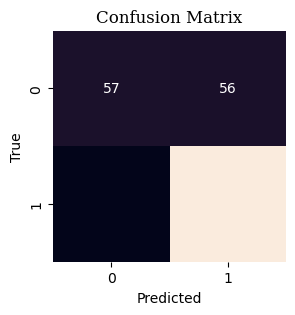

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

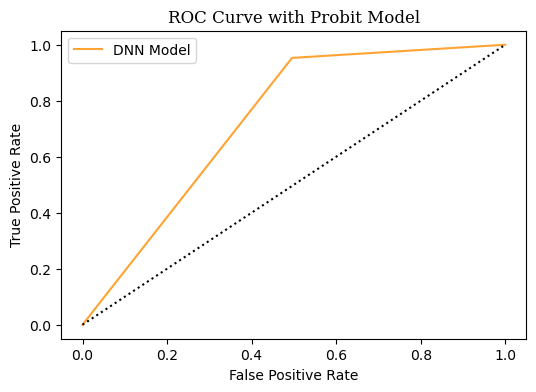

In [39]:
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'DNN Model', color = 'darkorange', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Probit Model', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()